DATA SET

https://archive.ics.uci.edu/ml/datasets/glass+identification

Dataset from USA Forensic Science Service
which has description of 7 types of glases,defined in terms of their
oxide content (i.e. Na, Fe, K, etc). 
Task is to use K-Nearest Neighbor (KNN) classifier to classify the glasses, based on given oxide content.

Target Variable:Type of glass
 Multi class variable

. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv("/content/trainKNN.txt")

In [ ]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [ ]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [ ]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,103.384615,1.518281,13.373846,2.750103,1.456154,72.639795,0.521744,8.911538,0.165077,0.050513,2.676923
std,60.913499,0.003057,0.784929,1.390655,0.492293,0.763064,0.673624,1.425102,0.486304,0.086506,2.064234
min,2.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,50.500000,1.516455,12.875000,2.335000,1.190000,72.330000,0.145000,8.220000,0.000000,0.000000,1.000000
50%,102.000000,1.517630,13.270000,3.480000,1.360000,72.810000,0.560000,8.570000,0.000000,0.000000,2.000000
75%,153.500000,1.518950,13.795000,3.605000,1.625000,73.080000,0.610000,9.105000,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,3.980000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [ ]:
df.info()# All columns are numeric, so no need to change data type of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      195 non-null    int64  
 1   RI             195 non-null    float64
 2   Na             195 non-null    float64
 3   Mg             195 non-null    float64
 4   Al             195 non-null    float64
 5   Si             195 non-null    float64
 6   K              195 non-null    float64
 7   Ca             195 non-null    float64
 8   Ba             195 non-null    float64
 9   Fe             195 non-null    float64
 10  Type of glass  195 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 16.9 KB


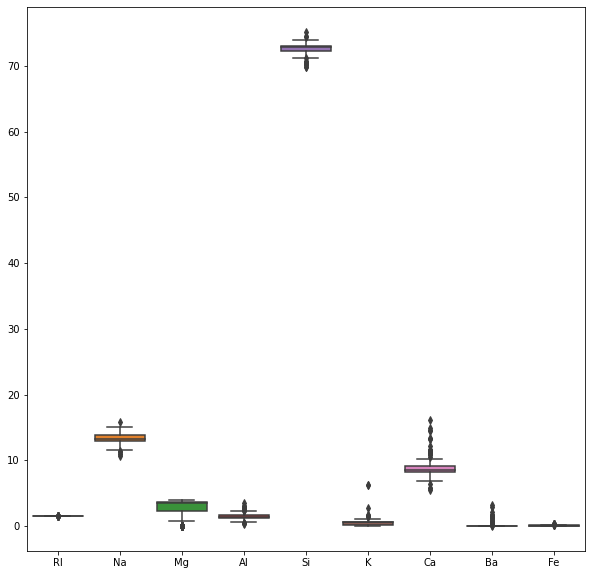

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:,1:10],orient="v")

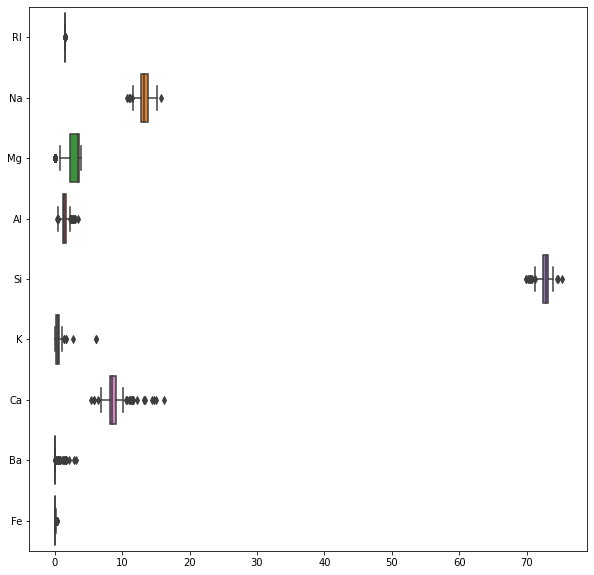

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:,1:10],orient="h")

In [ ]:
print(df.Na.describe())
print(df.info())

count    195.000000
mean      13.373846
std        0.784929
min       10.730000
25%       12.875000
50%       13.270000
75%       13.795000
max       15.790000
Name: Na, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      195 non-null    int64  
 1   RI             195 non-null    float64
 2   Na             195 non-null    float64
 3   Mg             195 non-null    float64
 4   Al             195 non-null    float64
 5   Si             195 non-null    float64
 6   K              195 non-null    float64
 7   Ca             195 non-null    float64
 8   Ba             195 non-null    float64
 9   Fe             195 non-null    float64
 10  Type of glass  195 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 16.9 KB
None


In [ ]:
#Outlier deetction and removal for Na feature
q3 = df.Na.quantile(0.75)
q1 = df.Na.quantile(0.25)
iqr = q3 - q1
lt = q1-iqr
ut = q3+iqr
print(lt, ut)
#df.Na=df.Na.clip(lt,ut)
df= df[ (df['Na']>lt)  &  (df['Na']<ut) ]# 22 records are dropped
df.describe()

11.955 14.715


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,95.445087,1.518103,13.320751,3.008382,1.419191,72.634509,0.550809,8.782717,0.095434,0.051676,2.335260
std,57.275686,0.002770,0.531856,1.184882,0.469265,0.689349,0.678080,1.238357,0.363570,0.085739,1.766212
min,2.000000,1.511310,12.160000,0.000000,0.470000,69.890000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,46.000000,1.516460,12.890000,3.150000,1.190000,72.330000,0.350000,8.170000,0.000000,0.000000,1.000000
50%,93.000000,1.517630,13.240000,3.510000,1.350000,72.780000,0.570000,8.550000,0.000000,0.000000,2.000000
75%,140.000000,1.518600,13.690000,3.610000,1.560000,73.040000,0.610000,9.070000,0.000000,0.100000,2.000000
max,210.000000,1.533930,14.700000,3.980000,3.500000,74.550000,6.210000,16.190000,2.880000,0.320000,7.000000


In [ ]:
#Check for outliers in Al,K,Ca,Ba
q3 = df.Al.quantile(0.75)
q1 = df.Al.quantile(0.25)
iqr = q3 - q1
lt = q1-iqr
ut = q3+iqr
print(lt, ut)
#df.Na=df.Na.clip(lt,ut)
df= df[ (df['Al']>lt)  &  (df['Al']<ut) ]# 25 records are dropped
df.describe()

0.8199999999999998 1.9300000000000002


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,88.979592,1.517957,13.221769,3.203129,1.369796,72.717755,0.521224,8.721293,0.043469,0.057551,2.061224
std,53.738136,0.002392,0.467033,0.912795,0.227055,0.555276,0.230047,1.115105,0.269740,0.090217,1.420132
min,2.000000,1.511310,12.160000,0.000000,0.830000,70.160000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,41.500000,1.516625,12.865000,3.365000,1.215000,72.420000,0.510000,8.160000,0.000000,0.000000,1.000000
50%,89.000000,1.517630,13.210000,3.520000,1.350000,72.810000,0.570000,8.520000,0.000000,0.000000,2.000000
75%,132.500000,1.518475,13.480000,3.610000,1.540000,73.035000,0.610000,8.830000,0.000000,0.110000,2.000000
max,208.000000,1.533930,14.460000,3.980000,1.900000,74.550000,1.760000,16.190000,2.880000,0.320000,7.000000


In [ ]:
#Check for outliers in Al,K,Ca,Ba
q3 = df.K.quantile(0.75)
q1 = df.K.quantile(0.25)
iqr = q3 - q1
lt = q1-iqr
ut = q3+iqr
print(lt, ut)
#df.Na=df.Na.clip(lt,ut)
df= df[ (df['K']>lt)  &  (df['K']<ut) ]# 35 records are dropped
df.describe()

0.41000000000000003 0.71


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,80.571429,1.517515,13.100357,3.446071,1.376696,72.779375,0.588393,8.483839,0.007768,0.062321,1.750000
std,50.619178,0.001323,0.354647,0.464039,0.189282,0.385427,0.053735,0.486486,0.034188,0.094545,0.925125
min,2.000000,1.512150,12.160000,0.000000,1.050000,71.810000,0.440000,7.830000,0.000000,0.000000,1.000000
25%,33.750000,1.516628,12.847500,3.447500,1.237500,72.537500,0.560000,8.120000,0.000000,0.000000,1.000000
50%,81.000000,1.517545,13.095000,3.535000,1.340000,72.845000,0.590000,8.430000,0.000000,0.000000,2.000000
75%,125.250000,1.518088,13.360000,3.610000,1.512500,73.030000,0.620000,8.692500,0.000000,0.112500,2.000000
max,188.000000,1.523150,14.040000,3.980000,1.900000,73.700000,0.700000,11.320000,0.270000,0.320000,7.000000


In [ ]:
#Check for outliers in Al,K,Ca,Ba
q3 = df.Ca.quantile(0.75)
q1 = df.Ca.quantile(0.25)
iqr = q3 - q1
lt = q1-iqr
ut = q3+iqr
print(lt, ut)
#df.Na=df.Na.clip(lt,ut)
df= df[ (df['Ca']>lt)  &  (df['Ca']<ut) ]# 4 records are dropped
df.describe()

7.547499999999999 9.264999999999999


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,78.074074,1.517417,13.091759,3.516111,1.365463,72.790741,0.590833,8.420000,0.005556,0.061481,1.685185
std,49.673834,0.001237,0.350206,0.231827,0.180702,0.379650,0.052295,0.337118,0.023733,0.094778,0.827655
min,2.000000,1.512150,12.160000,2.710000,1.050000,71.810000,0.440000,7.830000,0.000000,0.000000,1.000000
25%,32.750000,1.516603,12.847500,3.457500,1.230000,72.547500,0.560000,8.117500,0.000000,0.000000,1.000000
50%,77.500000,1.517535,13.090000,3.540000,1.330000,72.850000,0.590000,8.425000,0.000000,0.000000,2.000000
75%,122.250000,1.517977,13.345000,3.610000,1.490000,73.032500,0.620000,8.642500,0.000000,0.110000,2.000000
max,188.000000,1.523150,14.040000,3.980000,1.900000,73.700000,0.700000,9.230000,0.140000,0.320000,7.000000


In [ ]:
df.Ba.describe()

count    108.000000
mean       0.005556
std        0.023733
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.140000
Name: Ba, dtype: float64

In [ ]:
df.Ba.head()
new=(df['Ba']==0).sum()
new

102

In [ ]:
# As more than 90% values of Ba are zero so we need to drop it

In [ ]:

new=(df['Fe']==0).sum()
print(new)
df.shape
print(new/(df.shape[0])*100)

70
64.81481481481481


In [ ]:
# As more than 60% values of Fe are zero so we need to drop it

In [ ]:
# Dropping Id number column will not make any impact on final prediction so dropping it
# Dropping Fe and Ba column as most of values zeroes, oxide cannot have zero weight of metal
df = df[['RI','Na','Mg','Al','Si','K','Ca','Type of glass']]

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Type of glass
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.517417,13.091759,3.516111,1.365463,72.790741,0.590833,8.420000,1.685185
std,0.001237,0.350206,0.231827,0.180702,0.379650,0.052295,0.337118,0.827655
min,1.512150,12.160000,2.710000,1.050000,71.810000,0.440000,7.830000,1.000000
25%,1.516603,12.847500,3.457500,1.230000,72.547500,0.560000,8.117500,1.000000
50%,1.517535,13.090000,3.540000,1.330000,72.850000,0.590000,8.425000,2.000000
75%,1.517977,13.345000,3.610000,1.490000,73.032500,0.620000,8.642500,2.000000
max,1.523150,14.040000,3.980000,1.900000,73.700000,0.700000,9.230000,7.000000


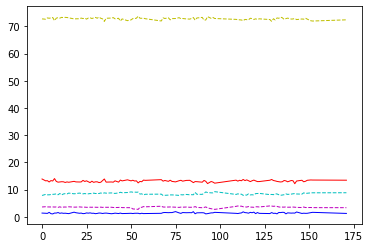

In [ ]:
#Scaling is mandatory for KNN
import matplotlib.pyplot as plt
plt.plot(df.Na,'r-',linewidth = '1')
plt.plot(df.Al,'b-',linewidth = '1')
#plt.plot(df.Ba,'g--',linewidth = '1')
plt.plot(df.Ca,'c--',linewidth = '1')
#plt.plot(df.Fe,'k--',linewidth = '1')
plt.plot(df.Mg,'m--',linewidth = '1')
plt.plot(df.Si,'y--',linewidth = '1')
plt.show()

From above graph we see Silicon values are very large compared to remaining features, so it needs to be scaled. Similarily "Na" feature values are high compared to remaining. Lets scale all of them


In [ ]:
#Seperate features and Target
X=df.iloc[:,:-1]
y=df['Type of glass']
print(y.head())
print(y.value_counts())
X.head()

0    1
2    1
3    1
4    1
5    1
Name: Type of glass, dtype: int64
1    49
2    48
3    10
7     1
Name: Type of glass, dtype: int64


,RI,Na,Mg,Al,Si,K,Ca
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07
5,1.51743,13.30,3.60,1.14,73.09,0.58,8.17


In [ ]:
#Split the Data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
print(X_train)
print(X_test)

In [ ]:
#Hyper parameter Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
#Find Best Value of k its 1, based on hit and trail and CV
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model

K value  :  1  train score :  1.0  cv score :  0.7458333333333333
K value  :  2  train score :  0.8837209302325582  cv score :  0.65
K value  :  3  train score :  0.8372093023255814  cv score :  0.6652777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

K value  :  4  train score :  0.8023255813953488  cv score :  0.663888888888889
K value  :  5  train score :  0.7906976744186046  cv score :  0.6888888888888889
K value  :  6  train score :  0.7325581395348837  cv score :  0.711111111111111
K value  :  7  train score :  0.7441860465116279  cv score :  0.6888888888888889
K value  :  8  train score :  0.7325581395348837  cv score :  0.7


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


K value  :  9  train score :  0.7325581395348837  cv score :  0.7
K value  :  10  train score :  0.7209302325581395  cv score :  0.6888888888888889
K value  :  20  train score :  0.6976744186046512  cv score :  0.6888888888888889
K value  :  50  train score :  0.5232558139534884  cv score :  0.4722222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
df.isna().sum()# No Null or missing Values

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Type of glass    0
dtype: int64

In [ ]:
#Build and train model using euclidean distance
 # using default value of neighbours as 5
knn=KNeighborsClassifier(1,p=2)#p default value 2 for euclidean distance, p value 1 for manhattan_distance


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))
y_pred= knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0
0.7272727272727273
0.7272727272727273


In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  2,  0],
       [ 3,  6,  0],
       [ 1,  0,  0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


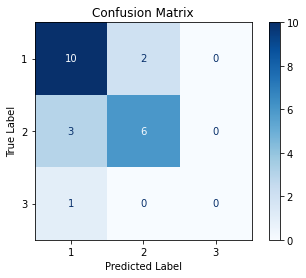

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.83      0.77        12
           2       0.75      0.67      0.71         9
           3       0.00      0.00      0.00         1

    accuracy                           0.73        22
   macro avg       0.49      0.50      0.49        22
weighted avg       0.70      0.73      0.71        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Build and train model using Manhattan distance
knn_m=KNeighborsClassifier(1,p=1)#p default value 2 for euclidean distance, p value 1 for manhattan_distance

In [ ]:
knn_m.fit(X_train,y_train)
knn_m.score(X_test,y_test)

0.8636363636363636

In [ ]:
y_pred_m= knn_m.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred_m,y_test)


0.8636363636363636

In [ ]:
confusion_matrix(y_test,y_pred_m)

array([[10,  2,  0],
       [ 0,  8,  1],
       [ 0,  0,  1]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


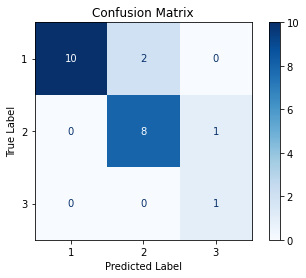

In [ ]:
color = 'black'
matrix = plot_confusion_matrix(knn_m, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
#plt.gcf().axes[0].tick_params(colors=color)
#plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred_m))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.80      0.89      0.84         9
           3       0.50      1.00      0.67         1

    accuracy                           0.86        22
   macro avg       0.77      0.91      0.81        22
weighted avg       0.90      0.86      0.87        22

              precision    recall  f1-score   support

           1       0.71      0.83      0.77        12
           2       0.75      0.67      0.71         9
           3       0.00      0.00      0.00         1

    accuracy                           0.73        22
   macro avg       0.49      0.50      0.49        22
weighted avg       0.70      0.73      0.71        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Second model using  Manhattan distance has better accuracy of 86% vs 1st model 
# using eculeadian distance with accuracy of 73%

# F1 score is also 0.91(Manhattan) vs 0.77(eculeadian distance)